In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

from keras.models import Sequential
from keras.preprocessing import sequence
from keras.utils import pad_sequences

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [ ]:
df = pd.read_csv("dataset5.csv", sep=';')
df.head()

,label,Tweet
0,6,kontol
1,6,kontol
2,4,bgst projects yang kapasitas kerja butuh orang...
3,6,anjiinggg
4,3,punya orangtua goblokk tololll sudah pada tua ...


In [ ]:
df.shape

(17276, 2)

In [ ]:
df.label.value_counts()

6    5681
5    5004
2    2349
3    1922
1    1637
4     683
Name: label, dtype: int64

In [ ]:
result = df.dtypes

print("Output:")
print(result)

Output:
label     int64
Tweet    object
dtype: object


In [ ]:
df["label"] = df["label"].astype("Int64")
df["Tweet"] = df["Tweet"].astype("str")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17276 entries, 0 to 17275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   17276 non-null  Int64 
 1   Tweet   17276 non-null  object
dtypes: Int64(1), object(1)
memory usage: 286.9+ KB


In [ ]:
number_label = 1637

shuffled = df.reindex(np.random.permutation(df.index))
u = shuffled[shuffled['label'] == 6][:number_label]
pp = shuffled[shuffled['label'] == 5][:number_label]
pc = shuffled[shuffled['label'] == 2][:number_label]
ke = shuffled[shuffled['label'] == 3][:number_label]
s = shuffled[shuffled['label'] == 1]
ka = shuffled[shuffled['label'] == 4]

concate = pd.concat([u, pp, pc, ke, s, ka], ignore_index=True)


#Shuffle the dataset
concate = concate.reindex(np.random.permutation(concate.index))

In [ ]:
concate.shape

(8868, 2)

In [ ]:
concate.head()

,label,Tweet
2499,5,gue diam saja banya yang benci alahh sianjng a...
2174,5,ah bangsat mau kapai lagi deh memek
4226,2,haaa anjing lo pdkt pas deact twt
2954,5,smntara mereka harus panas naik motor jauh dar...
3630,2,kenapa enggak ada yang asih tau kalo dighostin...


MAX_NUMBER_WORDS:  Hanya 50,000 kata yang paling umum (yang paling sering muncul) akan diperhitungkan dalam pemrosesan teks. Kata-kata yang kurang umum diabaikan. Parameter ini membantu dalam mengurangi dimensi data teks, sehingga membuat pemrosesan lebih efisien.


MAX_SEQ_LENGTH: Setiap teks yang panjangnya melebihi 250 kata akan dipotong atau dibatasi menjadi 250 kata. Untuk menjaga keseragaman panjang teks dalam data, sehingga memudahkan pemrosesan dan analisis.

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NUMBER_WORDS = 50000

# Max number of words in each complaint.
MAX_SEQ_LENGTH = 250

EMBEDDING_DIMENSION: representasi vektor dari kata-kata yang digunakan dalam model pemrosesan teks. Berarti setiap kata akan direpresentasikan sebagai vektor 64-dimensi.

In [ ]:
# This is fixed.

EMBEDDING_DIMENSION = 64
tokenize_tweet = Tokenizer(num_words=MAX_NUMBER_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenize_tweet.fit_on_texts(concate['Tweet'].values)
word_index = tokenize_tweet.word_index
print('Found %s unique tokens.' % len(word_index))

Found 10108 unique tokens.


Data dikonversi menjadi representasi angka dan diproses sehingga memiliki panjang yang seragam

In [ ]:
# Converting categorical labels to numbers.


X = tokenize_tweet.texts_to_sequences(concate['Tweet'].values)
X = pad_sequences(X, maxlen=MAX_SEQ_LENGTH)
print('Shape of data tensor:', X.shape) # berisi teks yang telah dikonversi menjadi urutan angka sesuai dengan kamus kata-kata

Shape of data tensor: (8868, 250)


In [ ]:
# Converting categorical labels to numbers.


Y = pd.get_dummies(concate['label']).values
print('Shape of label tensor:', Y.shape) #berisi representasi one-hot encoding dari label kategori.

Shape of label tensor: (8868, 6)


In [ ]:
# Train test split.


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7981, 250) (7981, 6)
(887, 250) (887, 6)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

from tqdm import tqdm

from keras.layers import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Embedding
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping

8 lapisan yang terdiri dari lapisan embedding, spatial dropout, bidirectional LSTM, dense, dropout, dense, dropout, dan softmax activation. Model ini digunakan untuk tugas klasifikasi teks dengan 6 kelas yang berbeda.

In [ ]:
epochs = 10
batch_size = 64


model = Sequential() # inisialisasi model Sequential
model.add(Embedding(MAX_NUMBER_WORDS,
                    EMBEDDING_DIMENSION,
                    input_length=X.shape[1])) # Lapisan embedding digunakan untuk mengkonversi urutan angka (representasi kata) menjadi vektor embedding
model.add(SpatialDropout1D(0.4)) # membantu dalam mencegah overfitting dengan secara acak menonaktifkan sebagian unit
model.add(Bidirectional(LSTM(EMBEDDING_DIMENSION,
                             dropout=0.1,
                             recurrent_dropout=0.1))) #"Bidirectional mengindikasikan bahwa LSTM digunakan dalam dua arah, yaitu dari masa lalu ke masa depan dan sebaliknya.
model.add(Dense(EMBEDDING_DIMENSION, activation='relu')) #Lapisan ini digunakan untuk memproses hasil dari lapisan sebelumnya dan melakukan transformasi linear terhadapnya
model.add(Dropout(0.2))
model.add(Dense(6)) #lapisan output yang akan menghasilkan output klasifikasi untuk 6 kelas yang berbeda
model.add(Dropout(0.3))
model.add(Activation('softmax')) #menghasilkan probabilitas kelas-kelas yang mungkin dalam tugas klasifikasi.
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,
                    Y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
113/113 [==============================] - 262s 2s/step - loss: 1.6390 - accuracy: 0.2814 - val_loss: 1.5011 - val_accuracy: 0.3830
Epoch 2/10
113/113 [==============================] - 238s 2s/step - loss: 1.4688 - accuracy: 0.3779 - val_loss: 1.1719 - val_accuracy: 0.5732
Epoch 3/10
113/113 [==============================] - 227s 2s/step - loss: 1.1102 - accuracy: 0.5673 - val_loss: 0.8187 - val_accuracy: 0.7284
Epoch 4/10
113/113 [==============================] - 258s 2s/step - loss: 0.8423 - accuracy: 0.6884 - val_loss: 0.7171 - val_accuracy: 0.7797
Epoch 5/10
113/113 [==============================] - 244s 2s/step - loss: 0.7096 - accuracy: 0.7406 - val_loss: 0.6844 - val_accuracy: 0.7947
Epoch 6/10
113/113 [==============================] - 227s 2s/step - loss: 0.6165 - accuracy: 0.7620 - val_loss: 0.6502 - val_accuracy: 0.8098
Epoch 7/10
113/113 [==============================] - 238s 2s/step - loss: 0.5473 - accuracy: 0.7817 - val_loss: 0.7033 - val_accuracy: 0.8035

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 64)           3200000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 64)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3

In [ ]:
accuracy_model = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy_model[0],accuracy_model[1]))

28/28 [==============================] - 3s 101ms/step - loss: 0.6939 - accuracy: 0.8005
Test set
  Loss: 0.694
  Accuracy: 0.800


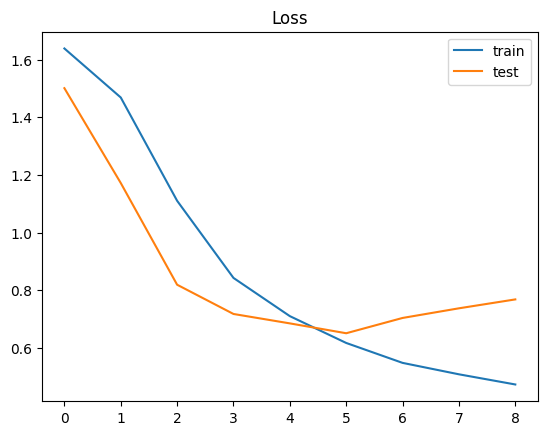

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

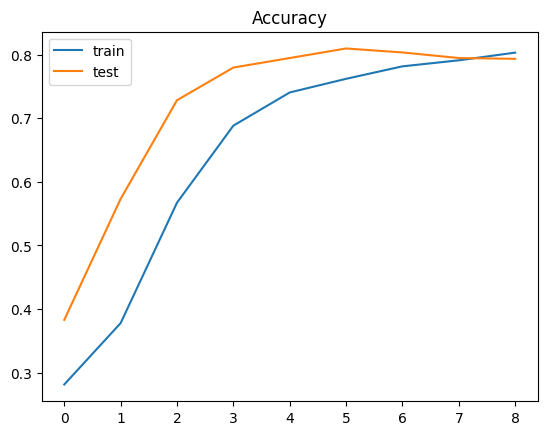

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
tweet_percobaan = ['CAPE BGT PUNYA KELUARGA ISINYA ORANG KAYAK KONTOL SEMUA']
sequence = tokenize_tweet.texts_to_sequences(tweet_percobaan)
padded = pad_sequences(sequence, maxlen=MAX_SEQ_LENGTH)
prediction_tweet = model.predict(padded)
labels = ['Studi','Percintaan','Keluarga','Karir/Pekerjaan','Person/Personal','Umpatan']
print(prediction_tweet, labels[np.argmax(prediction_tweet)])

1/1 [==============================] - 2s 2s/step
[[2.4690371e-04 2.6167964e-04 9.9887305e-01 1.3238723e-04 4.0556723e-04
  8.0320046e-05]] Keluarga


In [ ]:
# Confusion matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# classification report
def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred)) #laporan klasifikasi yang mencakup metrik-metrik seperti presisi (precision), recall, f1-score,
   acc_sc = accuracy_score(y_true, y_pred) #menghitung akurasi model.
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

#Visualisai matriks konfusi
def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [ ]:
preds = (model.predict(X_test) > 0.5).astype("int32")

28/28 [==============================] - 3s 108ms/step


In [ ]:
c_report(Y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       153
           1       0.85      0.80      0.83       153
           2       0.87      0.84      0.86       178
           3       0.82      0.72      0.77        71
           4       0.64      0.65      0.65       168
           5       0.87      0.79      0.83       164

   micro avg       0.82      0.78      0.80       887
   macro avg       0.83      0.78      0.80       887
weighted avg       0.83      0.78      0.80       887
 samples avg       0.78      0.78      0.78       887

Accuracy : 0.7824126268320181


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7824126268320181

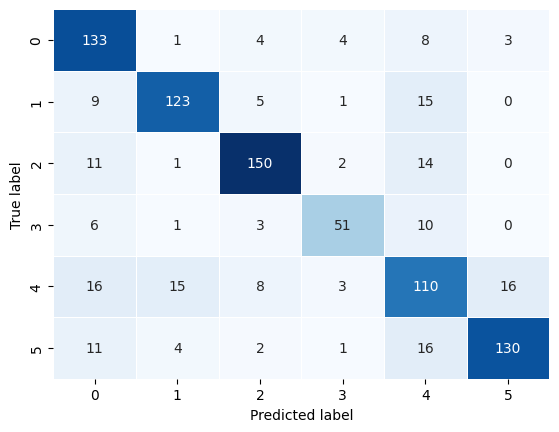

In [ ]:
plot_confusion_matrix(Y_test.argmax(axis=1), preds.argmax(axis=1))